In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.base import TransformerMixin ,BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential ,model_from_json
from tensorflow.keras.layers import Embedding,Dense,Dropout ,GlobalMaxPool1D,Activation,Flatten,Conv2D, LSTM, SpatialDropout1D

from IPython.display import clear_output
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import precision_recall_curve, confusion_matrix,classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def getMetrics(clfname, y_true, y_pred, model):
    print("".join(['-']*50))
    acc = mt.accuracy_score(y_true, y_pred)
    f1 = mt.f1_score(y_true, y_pred)
    pr = mt.precision_score(y_true, y_pred)
    auc = mt.roc_auc_score(y_true, y_pred)
    rec = mt.recall_score(y_true, y_pred)
    print(clfname.upper(), "\n")
    print("Confusion Matrix:\n")

    cm = pd.DataFrame(
    mt.confusion_matrix(y_true, y_pred),
    columns=['predicted false', 'predicted true'],
    index=['actual false', 'actual true']
    )
    print(cm)
    print("\nAccuracy = {}\nPrecision = {}\nf1-score = {}\nAUC score = {}\nRecall = {}".format(acc,pr,f1,auc, rec))
    print("".join(['-']*50) + "\n")

def plotResults(clfname, y_true, y_pred, color):
    fpr, tpr, thresh = mt.roc_curve(y_true, y_pred, pos_label=1)
    plt.plot(fpr, tpr, color = color, label=clfname)

In [ ]:
url = 'https://raw.githubusercontent.com/venkybe/Info206-FinalProject/main/disaster_data_relevance.csv'
df=pd.read_csv(url)
df.head()

,tweet,label
0,#Media Large wildfire in N. Colorado prompts e...,Relevant
1,RT @LarimerSheriff: #HighParkFire update http:...,Irrelevant
2,India Large wildfire in N. Colorado prompts ev...,Relevant
3,New #HighParkFire Evacs: 474 evac notices S &a...,Relevant
4,#50radio #NowPlaying 5-0 Radio app (Larimer Co...,Irrelevant


In [ ]:
onehotLabel = pd.get_dummies(df['label'])
onehotLabel.head()

,Irrelevant,Relevant
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
df.join(onehotLabel)

,tweet,label,Irrelevant,Relevant
0,#Media Large wildfire in N. Colorado prompts e...,Relevant,0,1
1,RT @LarimerSheriff: #HighParkFire update http:...,Irrelevant,1,0
2,India Large wildfire in N. Colorado prompts ev...,Relevant,0,1
3,New #HighParkFire Evacs: 474 evac notices S &a...,Relevant,0,1
4,#50radio #NowPlaying 5-0 Radio app (Larimer Co...,Irrelevant,1,0
...,...,...,...,...
5630,Paramedic vocal after Texas plant explosion fa...,Relevant,0,1
5631,RT @GlobalGrindNews: Criminal investigation la...,Relevant,0,1
5632,RT ‏@emptywheel Holder talks about pursuing t...,Relevant,0,1
5633,Bulldozers begin demolishing structures damage...,Relevant,0,1


In [ ]:
extras = ['rt', 'bangladesh', 'colorado', 'philippine', 'nswfires', 'australia', 'factory'\
          'springs', 'texas', 'haiyan', 'fertilizer', 'yycflood', 'philippines', 'boston', 'bigwet', 'west'\
         'plant', 'garment', 'dhaka', 'abflood', 'calgary', 'flood', 'floods', 'flooding', 'amp', 'reuters'\
         'earthquake', 'typhoon', 'queensland', 'coflood', 'wildfire']
for word in extras:
    STOPWORDS.add(word)

In [ ]:
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True)
removeChar = str.maketrans('', '', '&@#%')
df['tweet'] = [s.translate(removeChar) for s in df['tweet']]
df['tweet'] = [s.lower() for s in df['tweet']]
stpwords = set(STOPWORDS)
df.head()

,tweet,label
0,media large wildfire in n. colorado prompts ev...,Relevant
1,rt larimersheriff: highparkfire update,Irrelevant
2,india large wildfire in n. colorado prompts ev...,Relevant
3,new highparkfire evacs: 474 evac notices s amp...,Relevant
4,50radio nowplaying 5-0 radio app (larimer coun...,Irrelevant


In [ ]:
def wordCloud(text):
    wordcloud = WordCloud(stopwords=stpwords, background_color="white",width=800,height=800).generate(text)
    return wordcloud

In [ ]:
def plotWordCloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
words = " ".join(line.strip() for line in df[df['label'] == 'Relevant'].tweet)

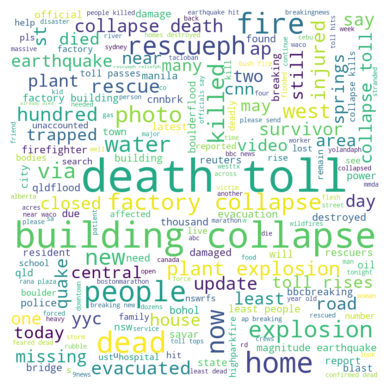

In [ ]:
wordcloudAllContents = wordCloud(words)
plotWordCloud(wordcloudAllContents)

In [ ]:
print(wordcloudAllContents.words_.keys())

dict_keys(['death toll', 'building collapse', 'dead', 'home', 'fire', 'people', 'now', 'rescueph', 'explosion', 'killed', 'factory collapse', 'water', 'photo', 'new', 'via', 'west', 'plant explosion', 'rescue', 'hundred', 'injured', 'ap', 'evacuated', 'collapse death', 'update', 'say', 'survivor', 'st', 'least', 'two', 'yyc', 'earthquake', 'still', 'house', 'area', 'road', 'near', 'closed', 'day', 'plant', 'collapse toll', 'one', 'quake', 'missing', 'toll rises', 'trapped', 'may', 'video', 'many', 'died', 'today', 'central', 'cnn', 'springs', 'magnitude earthquake', 'destroyed', 'will', 'bridge', 'report', 'factory building', 'latest', 'evacuation', 'city', 'official', 'damage', 'cnnbrk', 'due', 'reuters', 'found', 'least people', 'damaged', 'breaking', 'thousand', 'police', 'firefighter', 'qld', 'boulderflood', 'town', 'rescuers', 'bohol', 'qldflood', 'savar', 'state', 'need', 'building', 'manila', 'power', 'oil', 'nsw', 'bbcbreaking', 'blast', 'resident', 'toll passes', 'search', 're

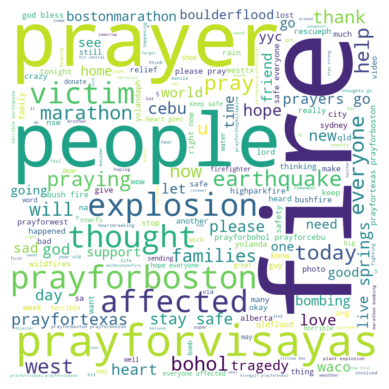

In [ ]:
irrelevant_words = " ".join(line.strip() for line in df[df['label'] == 'Irrelevant'].tweet)
wordcloudAllContents_irrelevant = wordCloud(irrelevant_words)
plotWordCloud(wordcloudAllContents_irrelevant)

In [ ]:
print(wordcloudAllContents_irrelevant.words_.keys())

dict_keys(['fire', 'prayer', 'people', 'prayforvisayas', 'prayforboston', 'explosion', 'thought', 'affected', 'victim', 'earthquake', 'today', 'pray', 'everyone', 'praying', 'west', 'help', 'bohol', 'marathon', 'will', 'thank', 'families', 'now', 'u', 'prayfortexas', 'cebu', 'hope', 'please', 'springs', 'stay safe', 'new', 'day', 'heart', 'love', 'god', 'prayers go', 'world', 'sad', 'friend', 'live', 'waco', 'tragedy', 'let', 'time', 'bostonmarathon', 'bombing', 'home', 'go', 'good', 'need', 'see', 'one', 'support', 'yyc', 'boulderflood', 'going', 'prayforbohol prayforcebu', 'know', 'nsw', 'yolandaph', 'make', 'really', 'god bless', 'still', 'week', 'family', 'sydney', 'keep', 'many', 'na', 'much', 'qld', 'right now', 'rain', 'alberta', 'prayforwest', 'highparkfire', 'thing', 'heard', 'prayfortexas prayforboston', 'wildfires', 'tonight', 'happened', 'please pray', 'lord', 'photo', 'wow', 'want', 'relief', 'ang', 'bush fire', 'lost', 'city', 'rescueph', 'video', 'qldflood', 'westtx', 's

In [ ]:
class TextTokenizer(BaseEstimator,TransformerMixin):
    """This is a simple Wrapper class for Keras Tokenizer."""
    def __init__(self,pad_sequences,num_words=10000,max_length=100,max_pad_length=100 ):
        self._num_words=num_words
        self.max_length=max_length
        self._tokenizer=None
        self._pad_sequences=pad_sequences
        self._max_pad_length=max_pad_length
        self.vocab_size=None
        self.tokenizer=None

    def transform(self,X,y=None):
        self.tokenizer,self.vocab_size=self._get_tokenizer(X['tweet'])
        X['tweet_encoded']=self.tokenizer.texts_to_sequences(X['tweet'])
        X['tweet_encoded']= X['tweet_encoded'].apply(lambda x: self._pad_sequences([x],maxlen=self._max_pad_length ,padding='post')[0])

        return X
    def _get_tokenizer(self,X):
        tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=self._num_words)
        tokenizer.fit_on_texts(X)
        vocab_size=len(tokenizer.word_index)+1
        return tokenizer,vocab_size

In [ ]:
tokenization=TextTokenizer(pad_sequences)
dataset_tokenized=tokenization.transform(df)
vocab_size=tokenization.vocab_size
print('Vocab Size:',vocab_size)
dataset_tokenized.head()

Vocab Size: 12276


,tweet,label,tweet_encoded
0,media large wildfire in n. colorado prompts ev...,Relevant,"[515, 686, 157, 3, 723, 10, 3060, 516, 433, 15..."
1,rt larimersheriff: highparkfire update,Irrelevant,"[1, 1274, 209, 203, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,india large wildfire in n. colorado prompts ev...,Relevant,"[1404, 686, 157, 3, 723, 10, 3060, 516, 0, 0, ..."
3,new highparkfire evacs: 474 evac notices s amp...,Relevant,"[168, 209, 2318, 4589, 1405, 4590, 480, 35, 28..."
4,50radio nowplaying 5-0 radio app (larimer coun...,Irrelevant,"[4597, 4598, 254, 977, 1275, 1892, 845, 405, 4..."


In [ ]:
x = df['tweet_encoded']
x = np.array([np.array(val) for val in x])
y=df['label']
y = np.array([np.array(val) for val in y])
print(x.shape)
print(y.shape)
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

(5635, 100)
(5635,)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3)
print('Number of Tweets in Training set: ',X_train.shape[0])
print('Number of Tweets in Test set: ',X_test.shape[0])

Number of Tweets in Training set:  3944
Number of Tweets in Test set:  1691


In [ ]:
max_length=100
embeding_dim=50
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embeding_dim,input_length=max_length))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           613800    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                        

In [ ]:
class PlotLosses(tf.keras.callbacks.Callback):
    """Simple utility function to plot the model losses during training"""
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
plot_losses = PlotLosses()

def save_model(model,save_name):
    with open(save_name,'w+') as f:
        f.write(model.to_json())
    model.save_weights(save_name+'.h5')

In [ ]:
model.fit(X_train,y_train,epochs=5,batch_size=10,verbose=1, validation_data=(X_test,y_test))
save_model(model,'CNN_model')

Epoch 1/5
395/395 [==============================] - 4s 9ms/step - loss: 0.5419 - accuracy: 0.7604 - val_loss: 0.3115 - val_accuracy: 0.8870
Epoch 2/5
395/395 [==============================] - 4s 9ms/step - loss: 0.2540 - accuracy: 0.9075 - val_loss: 0.2311 - val_accuracy: 0.9083
Epoch 3/5
395/395 [==============================] - 4s 9ms/step - loss: 0.1417 - accuracy: 0.9604 - val_loss: 0.2283 - val_accuracy: 0.9154
Epoch 4/5
395/395 [==============================] - 4s 9ms/step - loss: 0.0956 - accuracy: 0.9746 - val_loss: 0.2363 - val_accuracy: 0.9148
Epoch 5/5
395/395 [==============================] - 4s 9ms/step - loss: 0.0622 - accuracy: 0.9899 - val_loss: 0.2458 - val_accuracy: 0.9154


In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred  =  classifier.predict(X_test)
getMetrics("Naive Bayes", y_test, y_pred, classifier)
# plotResults("Naive Bayes", y_test, y_pred, 'blue')

--------------------------------------------------
NAIVE BAYES 

Confusion Matrix:

              predicted false  predicted true
actual false               62             874
actual true                26             729

Accuracy = 0.4677705499704317
Precision = 0.45477230193387397
f1-score = 0.6183206106870228
AUC score = 0.5159011150733005
Recall = 0.9655629139072848
--------------------------------------------------



In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
getMetrics("Random forest", y_test, y_pred, clf)
# plotResults("Random forest", y_test, y_pred, 'orange')

--------------------------------------------------
RANDOM FOREST 

Confusion Matrix:

              predicted false  predicted true
actual false              747             189
actual true               234             521

Accuracy = 0.7498521584861029
Precision = 0.7338028169014085
f1-score = 0.7112627986348123
AUC score = 0.7440715741212431
Recall = 0.6900662251655629
--------------------------------------------------



In [ ]:
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                              X_train,y_train, param_name="n_estimators", param_range=param_range,
                              cv=5, scoring="accuracy", n_jobs=-1)

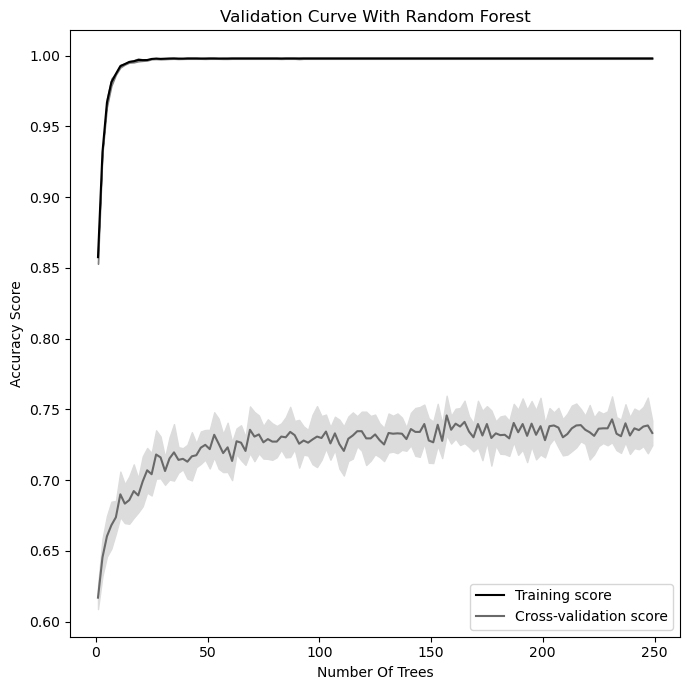

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve - Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = "error")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
getMetrics("XGBoost", y_test, y_pred, model)
# plotResults("XGBoost", y_test, y_pred, 'black')

--------------------------------------------------
XGBOOST 

Confusion Matrix:

              predicted false  predicted true
actual false              748             188
actual true               182             573

Accuracy = 0.7811945594322885
Precision = 0.7529566360052562
f1-score = 0.7559366754617414
AUC score = 0.7790428482481463
Recall = 0.7589403973509934
--------------------------------------------------



In [ ]:
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(xgb.XGBClassifier(),
                              X_train,y_train, param_name="n_estimators", param_range=param_range,
                              cv=5, scoring="accuracy", n_jobs=-1)

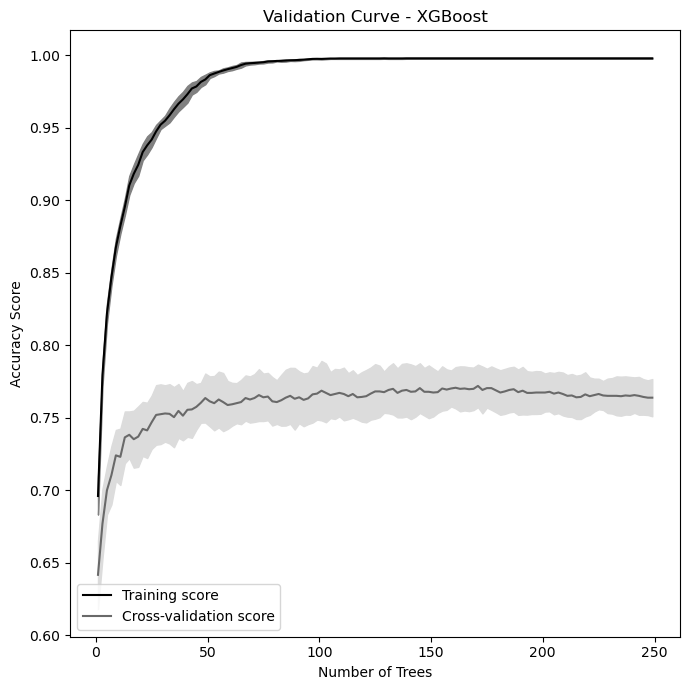

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve - XGBoost")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
getMetrics("Logistic Regression", y_test, y_pred, model)
# plotResults("Logistic Regression", y_test, y_pred, 'green')

--------------------------------------------------
LOGISTIC REGRESSION 

Confusion Matrix:

              predicted false  predicted true
actual false              639             297
actual true               366             389

Accuracy = 0.6079243051448847
Precision = 0.5670553935860059
f1-score = 0.5399028452463568
AUC score = 0.5989620478858889
Recall = 0.5152317880794702
--------------------------------------------------



C:\Users\santh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
getMetrics("Decision Tree", y_test, y_pred, dtree)
# plotResults("Decision Tree", y_test, y_pred, 'red')

--------------------------------------------------
DECISION TREE 

Confusion Matrix:

              predicted false  predicted true
actual false              650             286
actual true               263             492

Accuracy = 0.6753400354819633
Precision = 0.6323907455012854
f1-score = 0.6418786692759295
AUC score = 0.6730500367917586
Recall = 0.6516556291390728
--------------------------------------------------



In [ ]:
max_length=100
embeding_dim=50

lstm_model=Sequential()
lstm_model.add(Embedding(input_dim=vocab_size,output_dim=embeding_dim,input_length=X_train.shape[1]))
lstm_model.add(LSTM(25, activation='relu',return_sequences=True))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(10,activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'] )
lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           613800    
                                                                 
 lstm_1 (LSTM)               (None, 100, 25)           7600      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                      

In [ ]:
history = lstm_model.fit(X_train,y_train,epochs=5,batch_size=30,verbose=1, validation_data=(X_test,y_test))

Epoch 1/5
132/132 [==============================] - 11s 62ms/step - loss: 116635432124416.0000 - accuracy: 0.7102 - val_loss: 0.5709 - val_accuracy: 0.8374
Epoch 2/5
132/132 [==============================] - 8s 61ms/step - loss: 2190247723008.0000 - accuracy: 0.8476 - val_loss: 0.4639 - val_accuracy: 0.8551
Epoch 3/5
132/132 [==============================] - 8s 61ms/step - loss: 7143958249472.0000 - accuracy: 0.8674 - val_loss: 0.4116 - val_accuracy: 0.8729
Epoch 4/5
132/132 [==============================] - 8s 62ms/step - loss: 211119308800.0000 - accuracy: 0.8912 - val_loss: 0.3715 - val_accuracy: 0.8770
Epoch 5/5
132/132 [==============================] - 8s 62ms/step - loss: 1727780992.0000 - accuracy: 0.9047 - val_loss: 0.3171 - val_accuracy: 0.8900


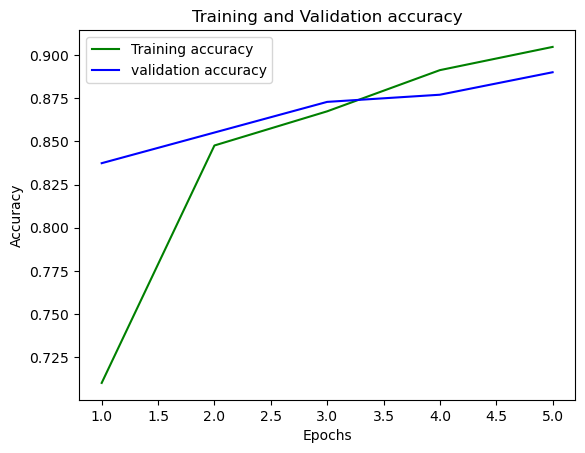

In [ ]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,6)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.layers import Bidirectional

max_length=100
embeding_dim=50

bi_lstm_model=Sequential()
bi_lstm_model.add(Embedding(input_dim=vocab_size,output_dim=embeding_dim,input_length=X_train.shape[1]))
bi_lstm_model.add(Bidirectional(LSTM(25, return_sequences=True)))
bi_lstm_model.add(GlobalMaxPool1D())
bi_lstm_model.add(Dropout(0.1))
bi_lstm_model.add(Dense(10,activation='relu'))
bi_lstm_model.add(Dropout(0.1))
bi_lstm_model.add(Dense(1,activation='sigmoid'))
bi_lstm_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'] )
bi_lstm_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 50)           613800    
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 50)          15200     
 nal)                                                            
                                                                 
 global_max_pooling1d_7 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 10)                510       
                                                                 
 dropout_16 (Dropout)        (None, 10)               

In [ ]:
history = bi_lstm_model.fit(X_train,y_train,epochs=5,batch_size=10,verbose=1, validation_data=(X_test,y_test))

Epoch 1/5
395/395 [==============================] - 34s 78ms/step - loss: 0.4464 - accuracy: 0.8144 - val_loss: 0.3082 - val_accuracy: 0.8918
Epoch 2/5
395/395 [==============================] - 30s 76ms/step - loss: 0.2444 - accuracy: 0.9095 - val_loss: 0.2618 - val_accuracy: 0.8805
Epoch 3/5
395/395 [==============================] - 30s 76ms/step - loss: 0.1767 - accuracy: 0.9381 - val_loss: 0.2458 - val_accuracy: 0.9131
Epoch 4/5
395/395 [==============================] - 30s 75ms/step - loss: 0.1409 - accuracy: 0.9521 - val_loss: 0.2658 - val_accuracy: 0.9007
Epoch 5/5
395/395 [==============================] - 29s 75ms/step - loss: 0.1256 - accuracy: 0.9587 - val_loss: 0.2403 - val_accuracy: 0.9042


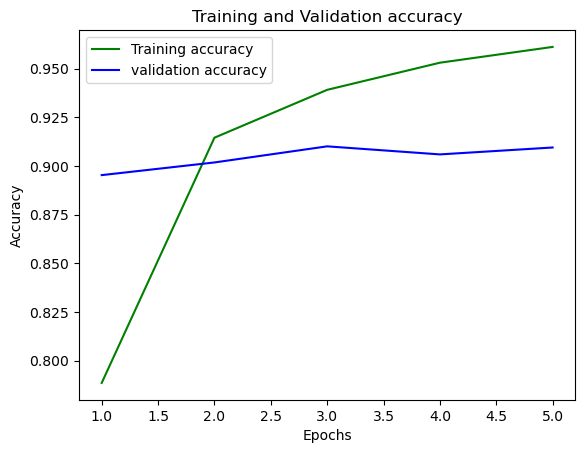

In [ ]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,6)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.layers import SimpleRNN

max_length=100
embeding_dim=50

rnn_model=Sequential()
rnn_model.add(Embedding(input_dim=vocab_size,output_dim=embeding_dim,input_length=X_train.shape[1]))
rnn_model.add(SimpleRNN(25, activation='relu',return_sequences=True))
rnn_model.add(GlobalMaxPool1D())
rnn_model.add(Dropout(0.1))
rnn_model.add(Dense(10,activation='relu'))
rnn_model.add(Dropout(0.1))
rnn_model.add(Dense(1,activation='sigmoid'))
rnn_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'] )
rnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 50)           613800    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100, 25)           1900      
                                                                 
 global_max_pooling1d_9 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_19 (Dropout)        (None, 25)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                260       
                                                                 
 dropout_20 (Dropout)        (None, 10)                0         
                                                      

In [ ]:
history = rnn_model.fit(X_train,y_train,epochs=5,batch_size=10,verbose=1, validation_data=(X_test,y_test))

Epoch 1/5
395/395 [==============================] - 14s 31ms/step - loss: 0.9456 - accuracy: 0.7946 - val_loss: 0.2919 - val_accuracy: 0.8829
Epoch 2/5
395/395 [==============================] - 12s 31ms/step - loss: 0.2667 - accuracy: 0.9181 - val_loss: 0.2574 - val_accuracy: 0.9072
Epoch 3/5
395/395 [==============================] - 12s 31ms/step - loss: 0.1898 - accuracy: 0.9389 - val_loss: 0.2309 - val_accuracy: 0.9042
Epoch 4/5
395/395 [==============================] - 12s 31ms/step - loss: 0.2907 - accuracy: 0.9544 - val_loss: 0.2881 - val_accuracy: 0.9077
Epoch 5/5
395/395 [==============================] - 12s 31ms/step - loss: 1.1633 - accuracy: 0.9587 - val_loss: 0.2440 - val_accuracy: 0.9125


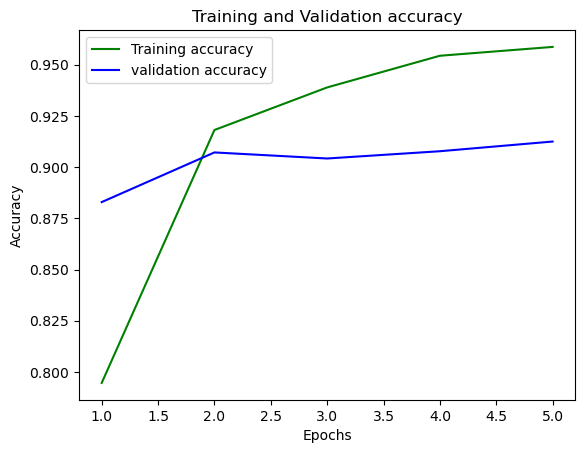

In [ ]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,6)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()